In [9]:
import matplotlib.pyplot as plt

from utils import test_combinations, plot_results
from load_embeddings import load_embedding_model
# from wordlist import mammals, birds, colors, fruits
from wordlist import animals, colors, verbs, geo_objects, body_parts, adjectives, pronouns, p_cs

In [11]:
vocab_size = 151936
dimensions = 1536
project_dir = "models" # adjust this path to yours
model, tokenizer = load_embedding_model(
    vocab_size,
    dimensions,
    f"{project_dir}/embeddings_qwen.pth",
    f"{project_dir}/unembeddings_qwen.pth",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"
)
model.eval()

SimpleModel(
  (embedding): Embedding(151936, 1536)
  (unembedding): Linear(in_features=1536, out_features=151936, bias=False)
)

C:\Users\raizi\OneDrive\Documents\GitHub_repos\superposition-in-continuous-chain-of-thought\utils.py:189: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  weights = torch.nn.functional.softmax(torch.tensor(weights))


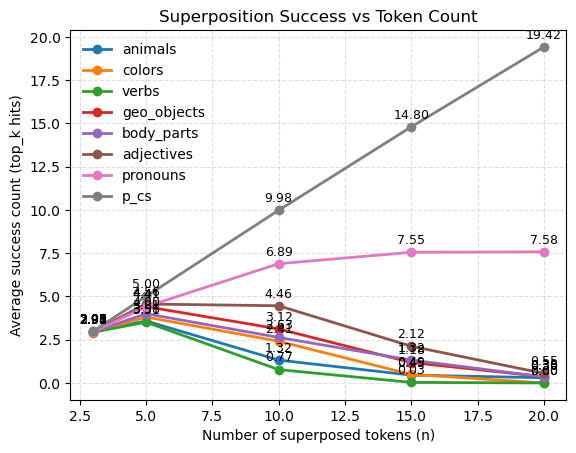

In [12]:
res_animals = test_combinations(animals, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30, superposition_mode='random')
res_colors = test_combinations(colors, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30, superposition_mode='random')
res_verbs = test_combinations(verbs, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30, superposition_mode='random')
res_geo_objects = test_combinations(geo_objects, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30, superposition_mode='random')
res_body_parts = test_combinations(body_parts, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30, superposition_mode='random')
res_adjectives = test_combinations(adjectives, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30, superposition_mode='random')
res_pronouns = test_combinations(pronouns, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30, superposition_mode='random')
res_p_cs = test_combinations(p_cs, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30, superposition_mode='random')

plot_results(res_animals, title="animals")
plot_results(res_colors, title="colors")
plot_results(res_verbs, title="verbs")
plot_results(res_geo_objects, title="geo_objects")
plot_results(res_body_parts, title="body_parts")
plot_results(res_adjectives, title="adjectives")
plot_results(res_pronouns, title="pronouns")
plot_results(res_p_cs, title="p_cs")

plt.show()

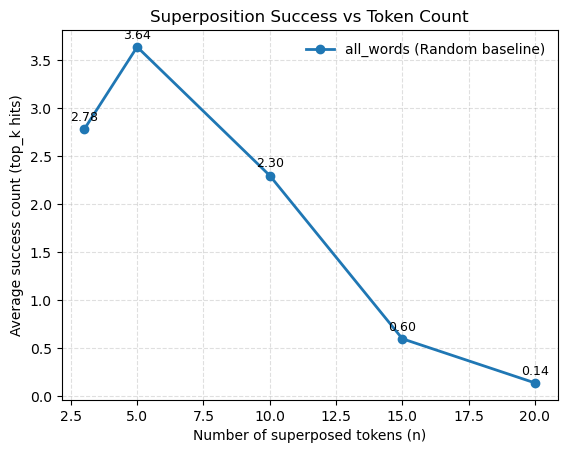

In [15]:
all_words = animals + colors + verbs + geo_objects + body_parts + adjectives + pronouns + p_cs
res_all_words = test_combinations(all_words, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30, superposition_mode='random')
plot_results(res_all_words, title="all_words (Random baseline)")
plt.show()

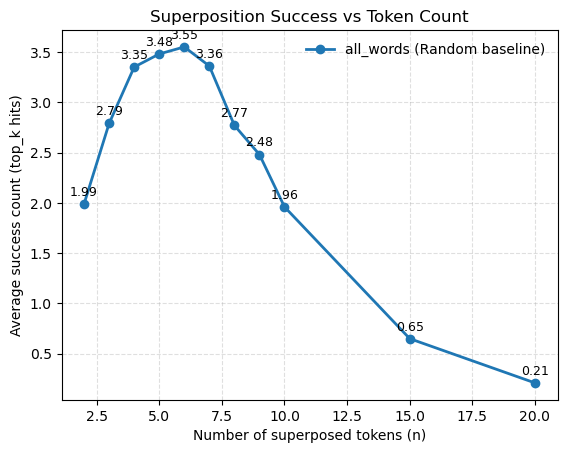

In [16]:
all_words = animals + colors + verbs + geo_objects + body_parts + adjectives + pronouns + p_cs
res_all_words = test_combinations(all_words, model, tokenizer, n_values=[2,3,4,5,6,7,8,9,10,15,20], num_trials=100, top_k=30, superposition_mode='random')
plot_results(res_all_words, title="all_words (Random baseline)")
plt.show()

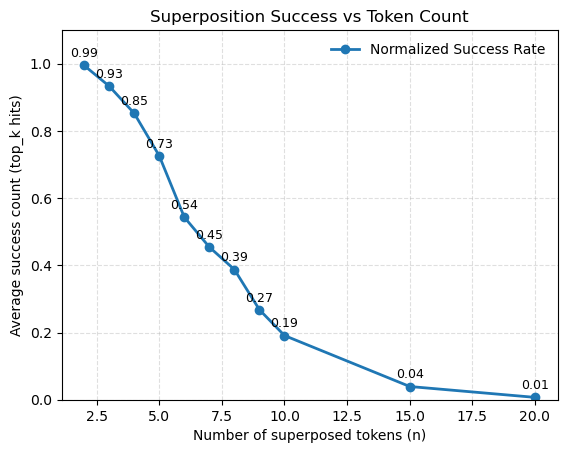

In [18]:
all_words = animals + colors + verbs + geo_objects + body_parts + adjectives + pronouns + p_cs
res_all_words = test_combinations(all_words, model, tokenizer, n_values=[2,3,4,5,6,7,8,9,10,15,20], num_trials=100, top_k=30, superposition_mode='random')
normalized = {n: val/n for n, val in res_all_words.items()}
plot_results(normalized, title="Normalized Success Rate")
plt.ylim(0, 1.1)
plt.show()

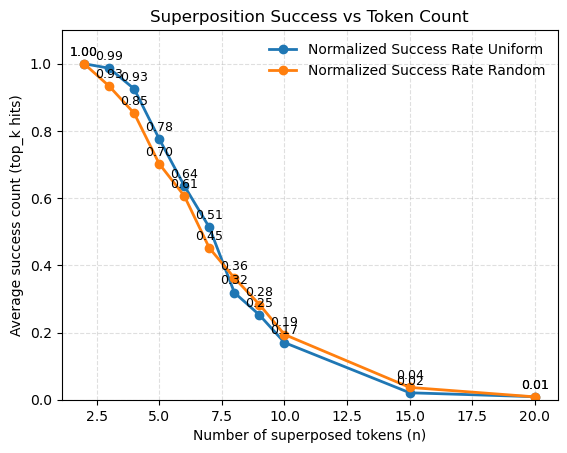

In [21]:
all_words = animals + colors + verbs + geo_objects + body_parts + adjectives + pronouns + p_cs
res_all_words_rand = test_combinations(all_words, model, tokenizer, n_values=[2,3,4,5,6,7,8,9,10,15,20], num_trials=100, top_k=30, superposition_mode='random')
res_all_words = test_combinations(all_words, model, tokenizer, n_values=[2,3,4,5,6,7,8,9,10,15,20], num_trials=100, top_k=30)
normalized_rand = {n: val/n for n, val in res_all_words_rand.items()}
normalized = {n: val/n for n, val in res_all_words.items()}
plot_results(normalized, title="Normalized Success Rate Uniform")
plot_results(normalized_rand, title="Normalized Success Rate Random")
plt.ylim(0, 1.1)
plt.show()

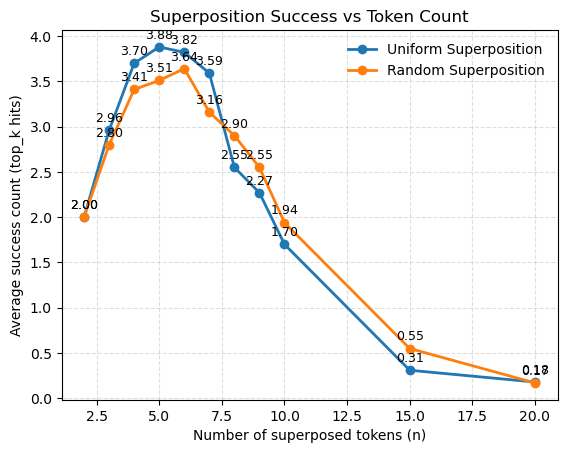

In [25]:
plot_results(res_all_words, title="Uniform Superposition")
plot_results(res_all_words_rand, title="Random Superposition")
plt.show()